In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def plot_mesh(xm, ym):
    for y in ym:
        plt.plot([xm[0],xm[-1]], [y,y], color = 'gray', ls = '-', lw = 0.5)
    for x in xm:
        plt.plot([x,x], [ym[0],ym[-1]], color = 'gray', ls = '-', lw = 0.5)

In [3]:
#
# 0       1       2       3       4       5   
# |                                       |   Nx  = 4 (nodos interiores)
# |-------|-------|-------|-------|-------|           (grados de libertad)
# |                                       |
# 0   1       2       3       4       5   6   hx = L / (Nx + 1)
#
#  <----------------- L ------------------>  
#
Nx = 4
Ny = 4
Lx = 1.0
Ly = 1.0
hx = Lx / (Nx+1)
hy = Ly / (Ny+1)
print(hx, hy)

0.2 0.2


In [4]:
NxT = Nx + 2
NyT = Ny + 2

# Coordenadas de la malla
xn = np.linspace(0,Lx,NxT)
yn = np.linspace(0,Ly,NyT)
print(NxT, NyT)
print(xn)
print(yn)

6 6
[0.  0.2 0.4 0.6 0.8 1. ]
[0.  0.2 0.4 0.6 0.8 1. ]


In [5]:
# Generación de una rejilla
xg, yg = np.meshgrid(xn, yn, indexing='ij', sparse=False)

print(xg)
print(yg)

[[0.  0.  0.  0.  0.  0. ]
 [0.2 0.2 0.2 0.2 0.2 0.2]
 [0.4 0.4 0.4 0.4 0.4 0.4]
 [0.6 0.6 0.6 0.6 0.6 0.6]
 [0.8 0.8 0.8 0.8 0.8 0.8]
 [1.  1.  1.  1.  1.  1. ]]
[[0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]]


In [9]:
# Definición de un campo escalar
T = np.zeros((NxT, NyT))
for i in range(NxT):
    for j in range(NyT):
        T[i,j] = 1#i / NxT
        
print(T)

[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]


In [10]:
# Valores en las fronteras del dominio
TL = 1.5; TR = 2.5
TB = 3.5; TT = 4.5

T[0 , :] = TL # LEFT
T[-1, :] = TR # RIGHT
T[: , 0] = TB # BOTTOM
T[: ,-1] = TT # TOP

# Dos puntos especiales en el dominio
T[NxT//3, NyT//3] = TT
T[2*NxT//3, 2*NyT//3] = TT

print(T)

[[3.5 1.5 1.5 1.5 1.5 4.5]
 [3.5 1.  1.  1.  1.  4.5]
 [3.5 1.  4.5 1.  1.  4.5]
 [3.5 1.  1.  1.  1.  4.5]
 [3.5 1.  1.  1.  4.5 4.5]
 [3.5 2.5 2.5 2.5 2.5 4.5]]


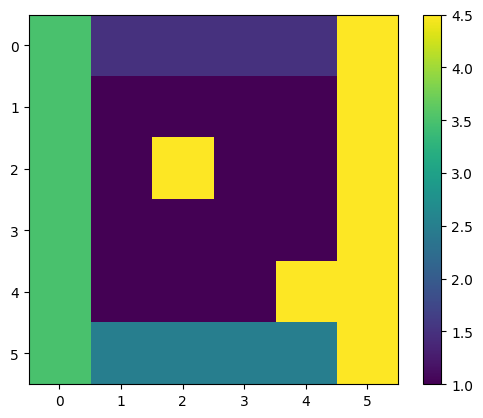

In [11]:
plt.imshow(T)
plt.colorbar()
plt.show()

In [ ]:
# Definición del campo vectorial (en este caso dos valores por nodo)
v = np.zeros((2, NxT, NyT))
A = 1.0
alpha_x = 1.0
alpha_y = 1.0
v[0] = -A * np.cos(np.pi * alpha_y * yg / Ly) * np.sin(np.pi * alpha_x * xg / Lx)
v[1] =  A * np.sin(np.pi * alpha_y * yg / Ly) * np.cos(np.pi * alpha_x * xg / Lx)

print(v[0])
print(v[1])

In [ ]:
fig = plt.figure(figsize=(9,5))

plt.subplot(1,2,1)
plt.imshow(v[0])

plt.subplot(1,2,2)
plt.imshow(v[1])

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.imshow(v[0])

plt.subplot(1,3,2)
plt.imshow(v[1])

plt.subplot(1,3,3)
plt.quiver(xg, yg, v[0], v[1])

plt.show()

In [ ]:
plt.scatter(xg, yg, marker='.')
plot_mesh(xn, yn)

In [ ]:
plt.scatter(xg, yg, marker='.')
plot_mesh(xn, yn)

plt.xticks(xn, labels=[])
plt.yticks(yn, labels=[])
plt.xlabel('$x$')
plt.ylabel('$y$')

lmax = max(Lx,Ly)
offx = lmax * 0.1
offy = lmax * 0.1
plt.xlim(-offx, Lx+offx)
plt.ylim(-offy, Ly+offy)

ax = plt.gca()
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", "5%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.scatter(xg, yg, marker='.')
plt.xticks(xn, labels=[])
plt.yticks(yn, labels=[])
plt.xlabel('$x$')
plt.ylabel('$y$')
lmax = max(Lx,Ly)
offx = lmax * 0.1
offy = lmax * 0.1
plt.xlim(-offx, Lx+offx)
plt.ylim(-offy, Ly+offy)
plot_mesh(xn, yn)
ax = plt.gca()
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", "5%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])

plt.subplot(1,3,2)
c = plt.contourf(xg, yg, T, levels=20, cmap='inferno')
plt.xticks(xn, labels=[])
plt.yticks(yn, labels=[])
plt.xlabel('$x$')
#plt.ylabel('$y$')
lmax = max(Lx,Ly)
offx = lmax * 0.1
offy = lmax * 0.1
plt.xlim(-offx, Lx+offx)
plt.ylim(-offy, Ly+offy)
plot_mesh(xn, yn)
ax = plt.gca()
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", "5%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
fig.colorbar(c, cax=cax, ticks=[0, TL, TR, TB, TT], orientation='vertical')

plt.subplot(1,3,3)
plt.quiver(xg, yg, v[0], v[1])
plt.xticks(xn, labels=[])
plt.yticks(yn, labels=[])
plt.xlabel('$x$')
#plt.ylabel('$y$')
plt.xlim(-offx, Lx+offx)
plt.ylim(-offy, Ly+offy)
plot_mesh(xn, yn)
ax = plt.gca()
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", "5%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])

plt.savefig('nodes.pdf')
plt.show()